In [1]:
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, Dropout, Bidirectional

import warnings
warnings.filterwarnings('ignore')

In [2]:
import ShapTimeRNN
from ShapTimeRNN import supertime, ShapleyValues, TimeImportance, TimeHeatmap, trans, supertime_add

In [3]:
data = pd.read_csv('D:/Papers/paper_code/new/Data/Processed/Gold_data.csv')
data.head()

,Date,Price,lag_P,lag_O,lag_H,lag_L,lag_V,lag_C,Year,Month,Day,Weekday
0,2014-01-04,0.149943,0.158273,0.152732,0.155756,0.157452,0.027404,0.552305,0.0,0.0,0.100000,0.833333
1,2014-01-06,0.144875,0.171988,0.160382,0.169941,0.168380,0.029368,0.660461,0.0,0.0,0.166667,0.000000
2,2014-01-07,0.139807,0.164133,0.171493,0.172295,0.163886,0.028526,0.456560,0.0,0.0,0.200000,0.166667
3,2014-01-08,0.139016,0.149943,0.147822,0.145744,0.155480,0.000000,0.396277,0.0,0.0,0.233333,0.333333
4,2014-01-09,0.141011,0.144875,0.148483,0.149385,0.148109,0.228021,0.481383,0.0,0.0,0.266667,0.500000


In [4]:
train = data[:-365]
test = data[-365:]
print(train.shape)
print(test.shape)

(1859, 12)
(365, 12)


In [5]:
x_train =  train.drop(columns = {'Date', 'Price'}, axis = 1)
y_train = train.loc[:, ['Price']]

x_test = test.drop(columns = {'Date', 'Price'}, axis = 1)
y_test = test.loc[:, ['Price']]

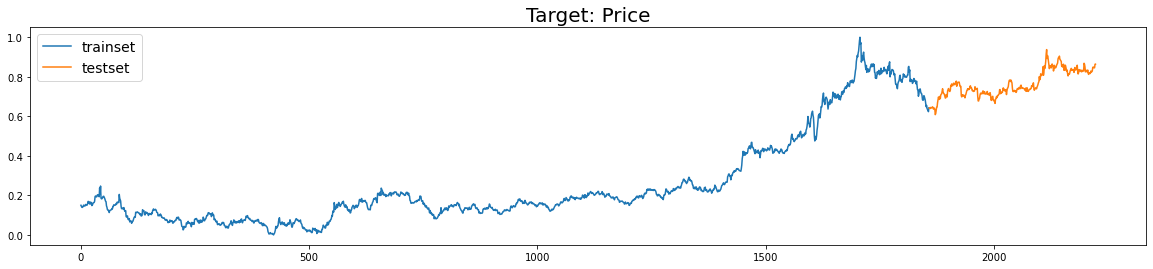

In [6]:
sns.reset_orig()
plt.figure(figsize = (20,4))
plt.title('Target: Price', fontsize = 20)
plt.plot(y_train['Price'], label = 'trainset')
plt.plot(y_test['Price'], label = 'testset')

plt.legend(fontsize = 14)
plt.show()

In [7]:
x_train_sca = x_train.values[:].reshape(x_train.shape[0], 1, x_train.shape[1])
x_test_sca = x_test.values[:].reshape(x_test.shape[0], 1, x_test.shape[1])

# RNN

In [20]:
model_rnn = tf.keras.Sequential([
        SimpleRNN(100, return_sequences=True,activation='relu'), 
        Dropout(0.1), 
        SimpleRNN(100,return_sequences=False),
        Dropout(0.2), 
        Dense(1) ])

model_rnn.compile(loss='mse', optimizer='adam') 
    
history = model_rnn.fit(x_train_sca, y_train, batch_size=64, epochs=100)

Epoch 1/100
30/30 [==============================] - 1s 1ms/step - loss: 0.0305
Epoch 2/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 3/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0065
Epoch 4/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 5/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 6/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0034
Epoch 7/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 8/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0028
Epoch 9/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 10/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 11/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0024
Epoch 12/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 13/100
30/30 [=================

In [21]:
prediction_rnn = model_rnn.predict(x_test_sca)

12/12 [==============================] - 0s 725us/step


In [22]:
r2 = r2_score(prediction_rnn, y_test)
mse = mean_squared_error(prediction_rnn, y_test)
print(r2)
print(mse)

0.7017970147819117
0.0011823131214394617


In [32]:
model_rnn.save('model_rnn.h5')

In [23]:
Tn= 10
interp_x= x_train_sca
model = model_rnn

ShapTime_rnn = ShapleyValues(model, interp_x, Tn)

24/24 [==============================] - 0s 627us/step


41/41 [==============================] - 0s 602us/step


29/29 [==============================] - 0s 621us/step


29/29 [==============================] - 0s 626us/step


47/47 [==============================] - 0s 577us/step


58/58 [==============================] - 0s 574us/step


In [24]:
ShapTime_rnn

[array([-0.0369907], dtype=float32),
 array([-0.05468258], dtype=float32),
 array([-0.06003803], dtype=float32),
 array([-0.02431924], dtype=float32),
 array([-0.03685686], dtype=float32),
 array([-0.02715624], dtype=float32),
 array([-0.0166142], dtype=float32),
 array([0.01137346], dtype=float32),
 array([0.08297157], dtype=float32),
 array([0.1628063], dtype=float32)]

In [25]:
time_columns =  ['t0', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9']

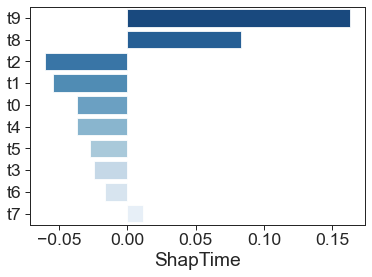

In [26]:
TimeImportance(Tn, trans(ShapTime_rnn), time_columns)

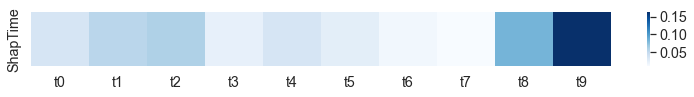

In [27]:
TimeHeatmap(Tn, trans(ShapTime_rnn), time_columns)

In [28]:
for k in range(Tn):
    exec(f't{k} = supertime_add(Tn, train)[k]')

In [29]:
check_replist = [t0, t1, t2, t3, t4, t5, t6, t9, t8, t9] 

In [30]:
#check
check = pd.concat(check_replist, axis = 0)
x_check = check.drop(columns = {'Date', 'Price'}, axis = 1)
y_check = check.loc[:, ['Price']]
x_check_sca = x_check.values[:].reshape(x_check.shape[0], 1, x_check.shape[1])


model_check = tf.keras.Sequential([
        SimpleRNN(100, return_sequences=True,activation='relu'), 
        Dropout(0.1), 
        SimpleRNN(100,return_sequences=False),
        Dropout(0.2), 
        Dense(1) ])

model_check.compile(loss='mse', optimizer='adam') 
    
history = model_check.fit(x_check_sca, y_check, batch_size=64, epochs=100)

Epoch 1/100
29/29 [==============================] - 1s 1ms/step - loss: 0.0735
Epoch 2/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0143
Epoch 3/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0110
Epoch 4/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0080
Epoch 5/100
29/29 [==============================] - 0s 1ms/step - loss: 0.0066
Epoch 6/100
29/29 [==============================] - 0s 1ms/step - loss: 0.0062
Epoch 7/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 8/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 9/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 10/100
29/29 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 11/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 12/100
29/29 [==============================] - 0s 1ms/step - loss: 0.0034
Epoch 13/100
29/29 [=================

In [31]:
pred_check = model_check.predict(x_test_sca)
r2_check = r2_score(pred_check, y_test)
mse_check = mean_squared_error(pred_check, y_test)

print(r2_check, 'Degree of Improvement: {:.2%}'.format((r2_check-r2)/abs(r2)))
print(mse_check, 'Degree of Improvement: {:.2%}'.format((mse-mse_check)/mse))

12/12 [==============================] - 0s 726us/step
0.8535902626101474 Degree of Improvement: 21.63%
0.0006288467056912412 Degree of Improvement: 46.81%


In [33]:
model_check.save('model_(rnn).h5')

# LSTM

In [21]:
model_lstm = tf.keras.Sequential([
        LSTM(100, return_sequences=True,activation='relu'), 
        Dropout(0.1), 
        LSTM(100,return_sequences=False),
        Dropout(0.2), 
        Dense(1) ])

model_lstm.compile(loss='mse', optimizer='adam') 
    
history = model_lstm.fit(x_train_sca, y_train, batch_size=64, epochs=150)

Epoch 1/150
30/30 [==============================] - 2s 2ms/step - loss: 0.0707
Epoch 2/150
30/30 [==============================] - 0s 2ms/step - loss: 0.0158
Epoch 3/150
30/30 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 4/150
30/30 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 5/150
30/30 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 6/150
30/30 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 7/150
30/30 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 8/150
30/30 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 9/150
30/30 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 10/150
30/30 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 11/150
30/30 [==============================] - 0s 3ms/step - loss: 9.8933e-04
Epoch 12/150
30/30 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 13/150
30/30 [=============

30/30 [==============================] - 0s 2ms/step - loss: 5.5917e-04
Epoch 99/150
30/30 [==============================] - 0s 2ms/step - loss: 5.6833e-04
Epoch 100/150
30/30 [==============================] - 0s 2ms/step - loss: 6.0088e-04
Epoch 101/150
30/30 [==============================] - 0s 2ms/step - loss: 5.8621e-04
Epoch 102/150
30/30 [==============================] - 0s 2ms/step - loss: 6.5133e-04
Epoch 103/150
30/30 [==============================] - 0s 2ms/step - loss: 6.0900e-04
Epoch 104/150
30/30 [==============================] - 0s 2ms/step - loss: 6.0656e-04
Epoch 105/150
30/30 [==============================] - 0s 3ms/step - loss: 6.0987e-04
Epoch 106/150
30/30 [==============================] - 0s 2ms/step - loss: 6.5686e-04
Epoch 107/150
30/30 [==============================] - 0s 2ms/step - loss: 5.1747e-04
Epoch 108/150
30/30 [==============================] - 0s 2ms/step - loss: 5.4310e-04
Epoch 109/150
30/30 [==============================] - 0s 2ms/step - 

In [22]:
prediction_lstm = model_lstm.predict(x_test_sca)

12/12 [==============================] - 0s 997us/step


In [23]:
r2 = r2_score(prediction_lstm, y_test)
mse = mean_squared_error(prediction_lstm, y_test)
print(r2)
print(mse)

0.8181909797074972
0.0005598986316912046


In [33]:
model_lstm.save('model_lstm.h5')

In [24]:
Tn= 10
interp_x= x_train_sca
model = model_lstm

ShapTime_lstm = ShapleyValues(model, interp_x, Tn)

24/24 [==============================] - 0s 867us/step


29/29 [==============================] - 0s 891us/step


29/29 [==============================] - 0s 819us/step


58/58 [==============================] - 0s 816us/step


In [25]:
ShapTime_lstm

[array([-0.04015526], dtype=float32),
 array([-0.05755072], dtype=float32),
 array([-0.06297155], dtype=float32),
 array([-0.02622125], dtype=float32),
 array([-0.03936397], dtype=float32),
 array([-0.02937607], dtype=float32),
 array([-0.01835672], dtype=float32),
 array([0.01178423], dtype=float32),
 array([0.09050726], dtype=float32),
 array([0.17222467], dtype=float32)]

In [26]:
time_columns =  ['t0', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9']

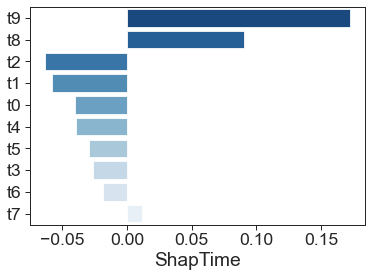

In [27]:
TimeImportance(Tn, trans(ShapTime_lstm), time_columns)

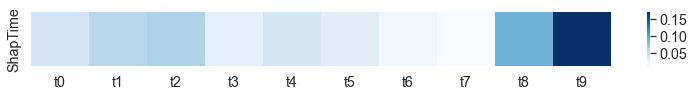

In [28]:
TimeHeatmap(Tn, trans(ShapTime_lstm), time_columns)

In [29]:
for k in range(Tn):
    exec(f't{k} = supertime_add(Tn, train)[k]')

In [30]:
check_replist = [t0, t1, t2, t3, t4, t5, t6, t9, t8, t9] 

In [31]:
#check
check = pd.concat(check_replist, axis = 0)
x_check = check.drop(columns = {'Date', 'Price'}, axis = 1)
y_check = check.loc[:, ['Price']]
x_check_sca = x_check.values[:].reshape(x_check.shape[0], 1, x_check.shape[1])


model_check = tf.keras.Sequential([
        LSTM(100, return_sequences=True,activation='relu'), 
        Dropout(0.1), 
        LSTM(100,return_sequences=False),
        Dropout(0.2), 
        Dense(1) ])


model_check.compile(loss='mse', optimizer='adam') 
    
history = model_check.fit(x_check_sca, y_check, batch_size=64, epochs=100)

Epoch 1/100
29/29 [==============================] - 3s 3ms/step - loss: 0.1024
Epoch 2/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0221
Epoch 3/100
29/29 [==============================] - 0s 4ms/step - loss: 0.0025
Epoch 4/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 5/100
29/29 [==============================] - 0s 4ms/step - loss: 0.0019
Epoch 6/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 7/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 8/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 9/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 10/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 11/100
29/29 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 12/100
29/29 [==============================] - 0s 4ms/step - loss: 0.0015
Epoch 13/100
29/29 [=================

In [32]:
pred_check = model_check.predict(x_test_sca)
pred_check = pred_check.reshape(365, 1)
r2_check = r2_score(pred_check, y_test)
mse_check = mean_squared_error(pred_check, y_test)

print(r2_check, 'Degree of Improvement: {:.2%}'.format((r2_check-r2)/abs(r2)))
print(mse_check, 'Degree of Improvement: {:.2%}'.format((mse-mse_check)/mse))

12/12 [==============================] - 0s 1ms/step
0.8287396039892662 Degree of Improvement: 1.29%
0.0005225613544395832 Degree of Improvement: 6.67%


In [34]:
model_check.save('model_(lstm).h5')

# GRU

In [34]:
model_gru = tf.keras.Sequential([
        GRU(100, return_sequences=True,activation='relu'), 
        Dropout(0.1), 
        GRU(100,return_sequences=False),
        Dropout(0.2), 
        Dense(1) ])

model_gru.compile(loss='mse', optimizer='adam') 
    
history = model_gru.fit(x_train_sca, y_train, batch_size=64, epochs=100)

Epoch 1/100
30/30 [==============================] - 3s 3ms/step - loss: 0.0427
Epoch 2/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 3/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 4/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 5/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 6/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 7/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 8/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 9/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 10/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 11/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0011
Epoch 12/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 13/100
30/30 [=================

In [35]:
prediction_gru = model_gru.predict(x_test_sca)

12/12 [==============================] - 0s 1ms/step


In [36]:
r2 = r2_score(prediction_gru, y_test)
mse = mean_squared_error(prediction_gru, y_test)
print(r2)
print(mse)

0.7096215892359299
0.0009620265574853106


In [37]:
model_gru.save('model_gru.h5')

In [38]:
Tn= 10
interp_x= x_train_sca
model = model_gru

ShapTime_gru = ShapleyValues(model, interp_x, Tn)

24/24 [==============================] - 0s 867us/step


24/24 [==============================] - 0s 826us/step


47/47 [==============================] - 0s 913us/step


58/58 [==============================] - 0s 1ms/step


In [39]:
time_columns =  ['t0', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9']

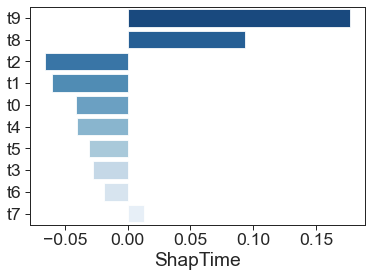

In [40]:
TimeImportance(Tn, trans(ShapTime_gru), time_columns)

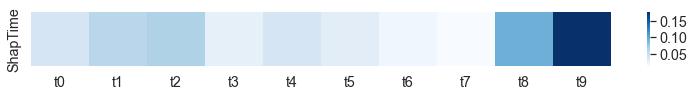

In [41]:
TimeHeatmap(Tn, trans(ShapTime_gru), time_columns)

In [42]:
for k in range(Tn):
    exec(f't{k} = supertime_add(Tn, train)[k]')

In [43]:
check_replist = [t0, t1, t2, t3, t4, t5, t6, t9, t8, t9] 

In [44]:
#check
check = pd.concat(check_replist, axis = 0)
x_check = check.drop(columns = {'Date', 'Price'}, axis = 1)
y_check = check.loc[:, ['Price']]
x_check_sca = x_check.values[:].reshape(x_check.shape[0], 1, x_check.shape[1])


model_check = tf.keras.Sequential([
        GRU(100, return_sequences=True,activation='relu'), 
        Dropout(0.1), 
        GRU(100,return_sequences=False),
        Dropout(0.2), 
        Dense(1) ])


model_check.compile(loss='mse', optimizer='adam') 
    
history = model_check.fit(x_check_sca, y_check, batch_size=64, epochs=100)

Epoch 1/100
29/29 [==============================] - 3s 6ms/step - loss: 0.0567
Epoch 2/100
29/29 [==============================] - 0s 6ms/step - loss: 0.0049
Epoch 3/100
29/29 [==============================] - 0s 6ms/step - loss: 0.0026
Epoch 4/100
29/29 [==============================] - 0s 6ms/step - loss: 0.0021
Epoch 5/100
29/29 [==============================] - 0s 6ms/step - loss: 0.0020
Epoch 6/100
29/29 [==============================] - 0s 6ms/step - loss: 0.0019
Epoch 7/100
29/29 [==============================] - 0s 6ms/step - loss: 0.0018
Epoch 8/100
29/29 [==============================] - 0s 6ms/step - loss: 0.0018
Epoch 9/100
29/29 [==============================] - 0s 6ms/step - loss: 0.0018
Epoch 10/100
29/29 [==============================] - 0s 6ms/step - loss: 0.0015
Epoch 11/100
29/29 [==============================] - 0s 6ms/step - loss: 0.0017
Epoch 12/100
29/29 [==============================] - 0s 6ms/step - loss: 0.0016
Epoch 13/100
29/29 [=================

In [45]:
pred_check = model_check.predict(x_test_sca)
pred_check = pred_check.reshape(365, 1)
r2_check = r2_score(pred_check, y_test)
mse_check = mean_squared_error(pred_check, y_test)

print(r2_check, 'Degree of Improvement: {:.2%}'.format((r2_check-r2)/abs(r2)))
print(mse_check, 'Degree of Improvement: {:.2%}'.format((mse-mse_check)/mse))

12/12 [==============================] - 0s 526us/step
0.7825433945804887 Degree of Improvement: 10.28%
0.000607683240833878 Degree of Improvement: 36.83%


In [46]:
model_check.save('model_(gru).h5')

# Bi-RNN

In [47]:
model_birnn = tf.keras.Sequential([
        Bidirectional(SimpleRNN(100, return_sequences=True,activation='relu')),
        Dropout(0.2),
        Dense(1) ])

model_birnn.compile(loss='mse', optimizer='adam') 
    
history = model_birnn.fit(x_train_sca, y_train, batch_size=64, epochs=100)

Epoch 1/100
30/30 [==============================] - 1s 2ms/step - loss: 0.0377
Epoch 2/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0097
Epoch 3/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0079
Epoch 4/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0069
Epoch 5/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 6/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 7/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 8/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 9/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 10/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 11/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 12/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 13/100
30/30 [=================

In [48]:
prediction_birnn = model_birnn.predict(x_test_sca)

12/12 [==============================] - 0s 997us/step


In [49]:
prediction_birnn = prediction_birnn.reshape(365, 1)

In [50]:
r2 = r2_score(prediction_birnn, y_test)
mse = mean_squared_error(prediction_birnn, y_test)
print(r2)
print(mse)

0.8048885151769302
0.0008756773074272818


In [60]:
model_birnn.save('model_birnn.h5')

In [51]:
Tn= 10
interp_x= x_train_sca
model = model_birnn

ShapTime_birnn = ShapleyValues(model, interp_x, Tn)

24/24 [==============================] - 0s 674us/step


41/41 [==============================] - 0s 712us/step


29/29 [==============================] - 0s 748us/step


58/58 [==============================] - 0s 678us/step


In [52]:
ShapTime_birnn

[array([[-0.04040167]], dtype=float32),
 array([[-0.05900422]], dtype=float32),
 array([[-0.06461748]], dtype=float32),
 array([[-0.02650505]], dtype=float32),
 array([[-0.04016383]], dtype=float32),
 array([[-0.02966511]], dtype=float32),
 array([[-0.01755965]], dtype=float32),
 array([[0.01353459]], dtype=float32),
 array([[0.09009481]], dtype=float32),
 array([[0.1747938]], dtype=float32)]

In [53]:
time_columns =  ['t0', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9']

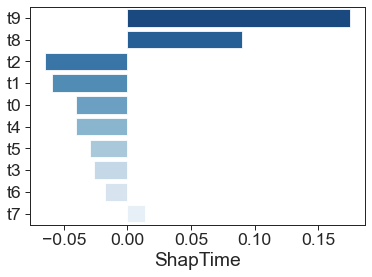

In [54]:
TimeImportance(Tn, trans(ShapTime_birnn), time_columns)

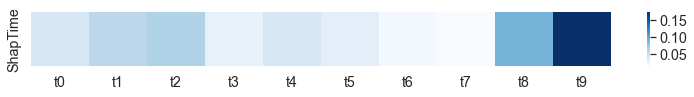

In [55]:
TimeHeatmap(Tn, trans(ShapTime_birnn), time_columns)

In [56]:
for k in range(Tn):
    exec(f't{k} = supertime_add(Tn, train)[k]')

In [57]:
check_replist = [t0, t1, t2, t3, t4, t5, t6, t9, t8, t9] 

In [58]:
#check
check = pd.concat(check_replist, axis = 0)
x_check = check.drop(columns = {'Date', 'Price'}, axis = 1)
y_check = check.loc[:, ['Price']]
x_check_sca = x_check.values[:].reshape(x_check.shape[0], 1, x_check.shape[1])


model_check = tf.keras.Sequential([
        Bidirectional(SimpleRNN(100, return_sequences=True,activation='relu')),
        Dropout(0.2),
        Dense(1) ])


model_check.compile(loss='mse', optimizer='adam') 
    
history = model_check.fit(x_check_sca, y_check, batch_size=64, epochs=100)

Epoch 1/100
29/29 [==============================] - 1s 2ms/step - loss: 0.0337
Epoch 2/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0134
Epoch 3/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 4/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0080
Epoch 5/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0076
Epoch 6/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0065
Epoch 7/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0053
Epoch 8/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 9/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 10/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 11/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 12/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 13/100
29/29 [=================

In [59]:
pred_check = model_check.predict(x_test_sca)
pred_check = pred_check.reshape(365, 1)
r2_check = r2_score(pred_check, y_test)
mse_check = mean_squared_error(pred_check, y_test)

print(r2_check, 'Degree of Improvement: {:.2%}'.format((r2_check-r2)/abs(r2)))
print(mse_check, 'Degree of Improvement: {:.2%}'.format((mse-mse_check)/mse))

12/12 [==============================] - 0s 1ms/step
0.8980018116641422 Degree of Improvement: 11.57%
0.0004500920609183597 Degree of Improvement: 48.60%


In [61]:
model_check.save('model_(birnn).h5')

# Bi-LSTM

In [44]:
model_bilstm = tf.keras.Sequential([
        Bidirectional(LSTM(100, return_sequences=True,activation='relu')),
        Dropout(0.2),
        Dense(1) ])

model_bilstm.compile(loss='mse', optimizer='adam') 
    
history = model_bilstm.fit(x_train_sca, y_train, batch_size=64, epochs=200)

Epoch 1/200
30/30 [==============================] - 2s 5ms/step - loss: 0.0403
Epoch 2/200
30/30 [==============================] - 0s 5ms/step - loss: 0.0072
Epoch 3/200
30/30 [==============================] - 0s 5ms/step - loss: 0.0015
Epoch 4/200
30/30 [==============================] - 0s 5ms/step - loss: 0.0012
Epoch 5/200
30/30 [==============================] - 0s 5ms/step - loss: 0.0013
Epoch 6/200
30/30 [==============================] - 0s 5ms/step - loss: 0.0011
Epoch 7/200
30/30 [==============================] - 0s 5ms/step - loss: 0.0011
Epoch 8/200
30/30 [==============================] - 0s 5ms/step - loss: 9.6224e-04
Epoch 9/200
30/30 [==============================] - 0s 5ms/step - loss: 0.0010
Epoch 10/200
30/30 [==============================] - 0s 5ms/step - loss: 0.0011
Epoch 11/200
30/30 [==============================] - 0s 5ms/step - loss: 9.5300e-04
Epoch 12/200
30/30 [==============================] - 0s 5ms/step - loss: 9.4784e-04
Epoch 13/200
30/30 [=====

30/30 [==============================] - 0s 5ms/step - loss: 4.9927e-04
Epoch 193/200
30/30 [==============================] - 0s 5ms/step - loss: 4.8092e-04
Epoch 194/200
30/30 [==============================] - 0s 5ms/step - loss: 4.6204e-04
Epoch 195/200
30/30 [==============================] - 0s 5ms/step - loss: 4.9678e-04
Epoch 196/200
30/30 [==============================] - 0s 5ms/step - loss: 4.9638e-04
Epoch 197/200
30/30 [==============================] - 0s 5ms/step - loss: 5.5938e-04
Epoch 198/200
30/30 [==============================] - 0s 5ms/step - loss: 4.7740e-04
Epoch 199/200
30/30 [==============================] - 0s 5ms/step - loss: 4.5909e-04
Epoch 200/200
30/30 [==============================] - 0s 5ms/step - loss: 4.7912e-04


In [45]:
prediction_bilstm = model_bilstm.predict(x_test_sca)
prediction_bilstm = prediction_bilstm.reshape(365, 1)

12/12 [==============================] - 0s 1ms/step


In [46]:
r2 = r2_score(prediction_bilstm, y_test)
mse = mean_squared_error(prediction_bilstm, y_test)
print(r2)
print(mse)

0.8790972843055566
0.0005464419081121899


In [56]:
model_bilstm.save('model_bilstm.h5')

In [47]:
Tn= 10
interp_x= x_train_sca
model = model_bilstm

ShapTime_bilstm = ShapleyValues(model, interp_x, Tn)

29/29 [==============================] - 0s 926us/step


29/29 [==============================] - 0s 855us/step


35/35 [==============================] - 0s 880us/step


58/58 [==============================] - 0s 1ms/step


In [48]:
ShapTime_bilstm

[array([[-0.04026649]], dtype=float32),
 array([[-0.05897135]], dtype=float32),
 array([[-0.0646911]], dtype=float32),
 array([[-0.02573725]], dtype=float32),
 array([[-0.03903832]], dtype=float32),
 array([[-0.02887004]], dtype=float32),
 array([[-0.01745085]], dtype=float32),
 array([[0.01352765]], dtype=float32),
 array([[0.08984958]], dtype=float32),
 array([[0.17216091]], dtype=float32)]

In [49]:
time_columns =  ['t0', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9']

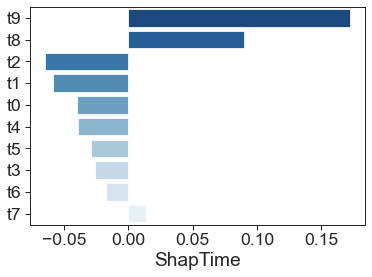

In [50]:
TimeImportance(Tn, trans(ShapTime_bilstm), time_columns)

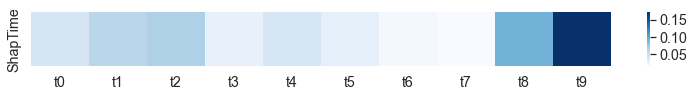

In [51]:
TimeHeatmap(Tn, trans(ShapTime_bilstm), time_columns)

In [52]:
for k in range(Tn):
    exec(f't{k} = supertime_add(Tn, train)[k]')

In [53]:
check_replist = [t0, t1, t2, t3, t4, t5, t6, t9, t8, t9] 

In [54]:
#check
check = pd.concat(check_replist, axis = 0)
x_check = check.drop(columns = {'Date', 'Price'}, axis = 1)
y_check = check.loc[:, ['Price']]
x_check_sca = x_check.values[:].reshape(x_check.shape[0], 1, x_check.shape[1])


model_check = tf.keras.Sequential([
        Bidirectional(LSTM(100, return_sequences=True,activation='relu')),
        Dropout(0.2),
        Dense(1) ])


model_check.compile(loss='mse', optimizer='adam') 
    
history = model_check.fit(x_check_sca, y_check, batch_size=64, epochs=100)

Epoch 1/100
29/29 [==============================] - 2s 5ms/step - loss: 0.0699
Epoch 2/100
29/29 [==============================] - 0s 5ms/step - loss: 0.0115
Epoch 3/100
29/29 [==============================] - 0s 5ms/step - loss: 0.0019
Epoch 4/100
29/29 [==============================] - 0s 5ms/step - loss: 0.0017
Epoch 5/100
29/29 [==============================] - 0s 5ms/step - loss: 0.0016
Epoch 6/100
29/29 [==============================] - 0s 5ms/step - loss: 0.0015
Epoch 7/100
29/29 [==============================] - 0s 5ms/step - loss: 0.0015
Epoch 8/100
29/29 [==============================] - 0s 5ms/step - loss: 0.0013
Epoch 9/100
29/29 [==============================] - 0s 5ms/step - loss: 0.0012
Epoch 10/100
29/29 [==============================] - 0s 5ms/step - loss: 0.0013
Epoch 11/100
29/29 [==============================] - 0s 5ms/step - loss: 0.0013
Epoch 12/100
29/29 [==============================] - 0s 5ms/step - loss: 0.0011
Epoch 13/100
29/29 [=================

In [55]:
pred_check = model_check.predict(x_test_sca)
pred_check = pred_check.reshape(365, 1)
r2_check = r2_score(pred_check, y_test)
mse_check = mean_squared_error(pred_check, y_test)

print(r2_check, 'Degree of Improvement: {:.2%}'.format((r2_check-r2)/abs(r2)))
print(mse_check, 'Degree of Improvement: {:.2%}'.format((mse-mse_check)/mse))

12/12 [==============================] - 0s 1ms/step
0.9002547910660049 Degree of Improvement: 2.41%
0.0004338111359693211 Degree of Improvement: 20.61%


In [57]:
model_check.save('model_(bilstm).h5')

# Bi-GRU

In [8]:
model_bigru = tf.keras.Sequential([
        Bidirectional(GRU(100, return_sequences=True,activation='relu')),
        Dropout(0.2),
        Dense(1) ])

model_bigru.compile(loss='mse', optimizer='adam') 
    
history = model_bigru.fit(x_train_sca, y_train, batch_size=64, epochs=100)

Epoch 1/100
30/30 [==============================] - 2s 2ms/step - loss: 0.0424
Epoch 2/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 3/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 4/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 5/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 6/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 7/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 8/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 9/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 10/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 11/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 12/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 13/100
30/30 [=================

In [9]:
prediction_bigru = model_bigru.predict(x_test_sca)
prediction_bigru = prediction_bigru.reshape(365, 1)

12/12 [==============================] - 0s 816us/step


In [10]:
r2 = r2_score(prediction_bigru, y_test)
mse = mean_squared_error(prediction_bigru, y_test)
print(r2)
print(mse)

0.8664094315241305
0.0006175099848940329


In [21]:
model_bigru.save('model_bigru.h5')

In [11]:
Tn= 10
interp_x= x_train_sca
model = model_bigru

ShapTime_bigru = ShapleyValues(model, interp_x, Tn)

24/24 [==============================] - 0s 694us/step


41/41 [==============================] - 0s 677us/step


29/29 [==============================] - 0s 890us/step


47/47 [==============================] - 0s 615us/step


58/58 [==============================] - 0s 601us/step


In [12]:
ShapTime_bigru

[array([[-0.03943086]], dtype=float32),
 array([[-0.05730686]], dtype=float32),
 array([[-0.06257742]], dtype=float32),
 array([[-0.02633918]], dtype=float32),
 array([[-0.03925401]], dtype=float32),
 array([[-0.02918715]], dtype=float32),
 array([[-0.01809504]], dtype=float32),
 array([[0.01248878]], dtype=float32),
 array([[0.08807658]], dtype=float32),
 array([[0.17213534]], dtype=float32)]

In [13]:
time_columns =  ['t0', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9']

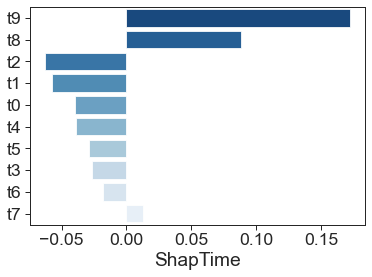

In [14]:
TimeImportance(Tn, trans(ShapTime_bigru), time_columns)

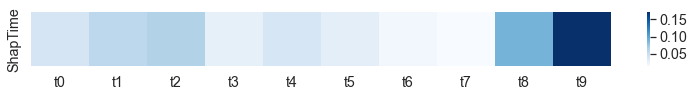

In [15]:
TimeHeatmap(Tn, trans(ShapTime_bigru), time_columns)

In [16]:
for k in range(Tn):
    exec(f't{k} = supertime_add(Tn, train)[k]')

In [17]:
check_replist = [t0, t1, t2, t3, t4, t5, t6, t9, t8, t9] 

In [18]:
#check
check = pd.concat(check_replist, axis = 0)
x_check = check.drop(columns = {'Date', 'Price'}, axis = 1)
y_check = check.loc[:, ['Price']]
x_check_sca = x_check.values[:].reshape(x_check.shape[0], 1, x_check.shape[1])


model_check = tf.keras.Sequential([
        Bidirectional(GRU(100, return_sequences=True,activation='relu')),
        Dropout(0.2),
        Dense(1) ])


model_check.compile(loss='mse', optimizer='adam') 
    
history = model_check.fit(x_check_sca, y_check, batch_size=64, epochs=100)

Epoch 1/100
29/29 [==============================] - 2s 2ms/step - loss: 0.0341
Epoch 2/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 3/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 4/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 5/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 6/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 7/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 8/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 9/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 10/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 11/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 12/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 13/100
29/29 [=================

Epoch 99/100
29/29 [==============================] - 0s 2ms/step - loss: 7.1475e-04
Epoch 100/100
29/29 [==============================] - 0s 2ms/step - loss: 6.6664e-04


In [19]:
pred_check = model_check.predict(x_test_sca)
pred_check = pred_check.reshape(365, 1)
r2_check = r2_score(pred_check, y_test)
mse_check = mean_squared_error(pred_check, y_test)

print(r2_check, 'Degree of Improvement: {:.2%}'.format((r2_check-r2)/abs(r2)))
print(mse_check, 'Degree of Improvement: {:.2%}'.format((mse-mse_check)/mse))

12/12 [==============================] - 0s 816us/step
0.9043358548354892 Degree of Improvement: 4.38%
0.00040852189814091555 Degree of Improvement: 33.84%


In [22]:
model_check.save('model_(bigru).h5')